# project no 3 Comcast Telecom Consumer Complaints Analysis

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df =pd.read_csv(r"C:\Users\erhim\Downloads\cc.csv")

In [3]:
df.head()


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [5]:
df.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [6]:
df["date_index"] = df["Date_month_year"] + " " + df["Time"]

In [7]:
df["date_index"]

0        22-Apr-15 3:53:50 PM
1       04-Aug-15 10:22:56 AM
2        18-Apr-15 9:55:47 AM
3       05-Jul-15 11:59:35 AM
4        26-May-15 1:25:26 PM
                ...          
2219     04-Feb-15 9:13:18 AM
2220     06-Feb-15 1:24:39 PM
2221     06-Sep-15 5:28:41 PM
2222    23-Jun-15 11:13:30 PM
2223    24-Jun-15 10:28:33 PM
Name: date_index, Length: 2224, dtype: object

In [8]:
df["date_index"] = pd.to_datetime(df["date_index"])
df["Date_month_year"] = pd.to_datetime(df["Date_month_year"])


In [9]:
df.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
date_index                     datetime64[ns]
dtype: object

In [10]:
df = df.set_index(df["date_index"])

In [11]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
date_index,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26


-> provide the trend chart for the number of complaints at monthly and daiy granularity level 

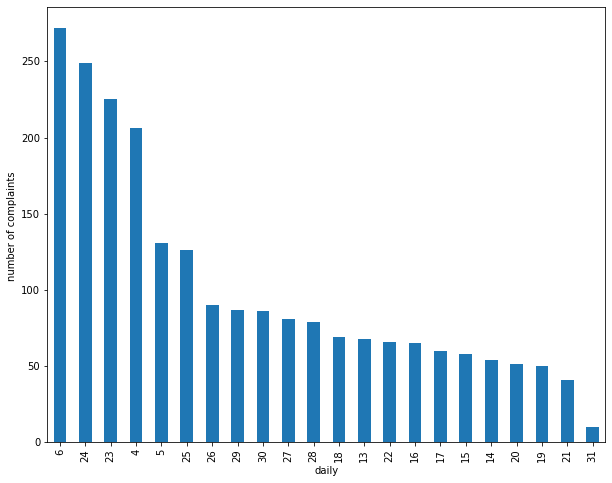

In [30]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
df["Date_month_year"] = pd.to_datetime(df["Date_month_year"])
df["day"] = df["Date_month_year"].dt.day
df["day"].value_counts().plot(kind = 'bar')
plt.ylabel("number of complaints ")
plt.xlabel("daily")
plt.show()

In [13]:
df.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
date_index                     datetime64[ns]
dtype: object

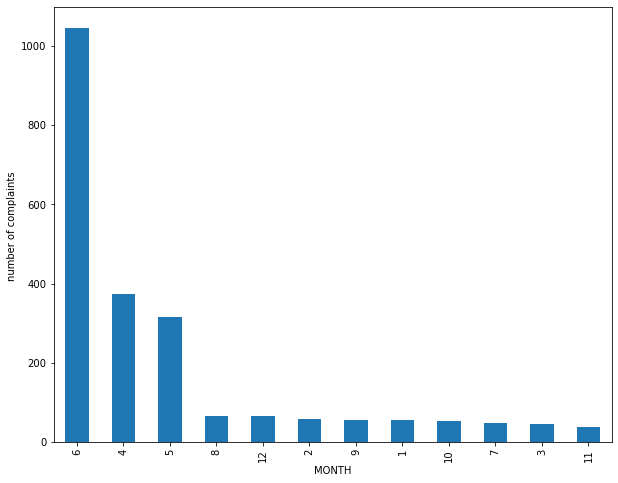

In [14]:
df["Date_month_year"] = pd.to_datetime(df["Date_month_year"])
df["month"] = df["Date_month_year"].dt.month
df["month"].value_counts().plot(kind = 'bar')
plt.ylabel("number of complaints ")
plt.xlabel("MONTH")
plt.show()

# . the trend charts for the number of complaints at monthly and daily granularity levels.

->Provide a table with the frequency of complaint types

In [15]:
#df["Customer Complaint"].unique()
df2 = df.groupby(["Customer Complaint"]).size().sort_values(ascending = False).to_frame()
df2


,0
Customer Complaint,
Comcast,83
Comcast Internet,18
Comcast Data Cap,17
comcast,13
Comcast Data Caps,11
...,...
Lack of availability,1
Lack of communication and poor customer service,1
Lack of consistent service,1


# a table with the frequency of complaint types.

->Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [16]:
df["modified_Status"] = ["Open"  if (status == 'Open' or status =='Pending') else 'Closed' for status in df["Status"]]
df.head(10)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,month,modified_Status
date_index,,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,4,Closed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,8,Closed
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,4,Closed
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,7,Open
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,5,Closed
2015-12-06 21:59:40,338519,ISP Charging for arbitrary data limits with ov...,06-12-15,2015-12-06,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-12-06 21:59:40,12,Closed
2015-06-24 10:13:55,361148,Throttling service and unreasonable data caps,24-06-15,2015-06-24,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,2015-06-24 10:13:55,6,Open
2015-06-23 18:56:14,359792,Comcast refuses to help troubleshoot and corre...,23-06-15,2015-06-23,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No,2015-06-23 18:56:14,6,Closed
2015-01-06 23:46:30,318072,Comcast extended outages,06-01-15,2015-01-06,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No,2015-01-06 23:46:30,1,Closed


# Created a new categorical variable with value as Open and Closed. where Open & Pending is categorized as Open and Closed & Solved is categorized as Closed

->Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on

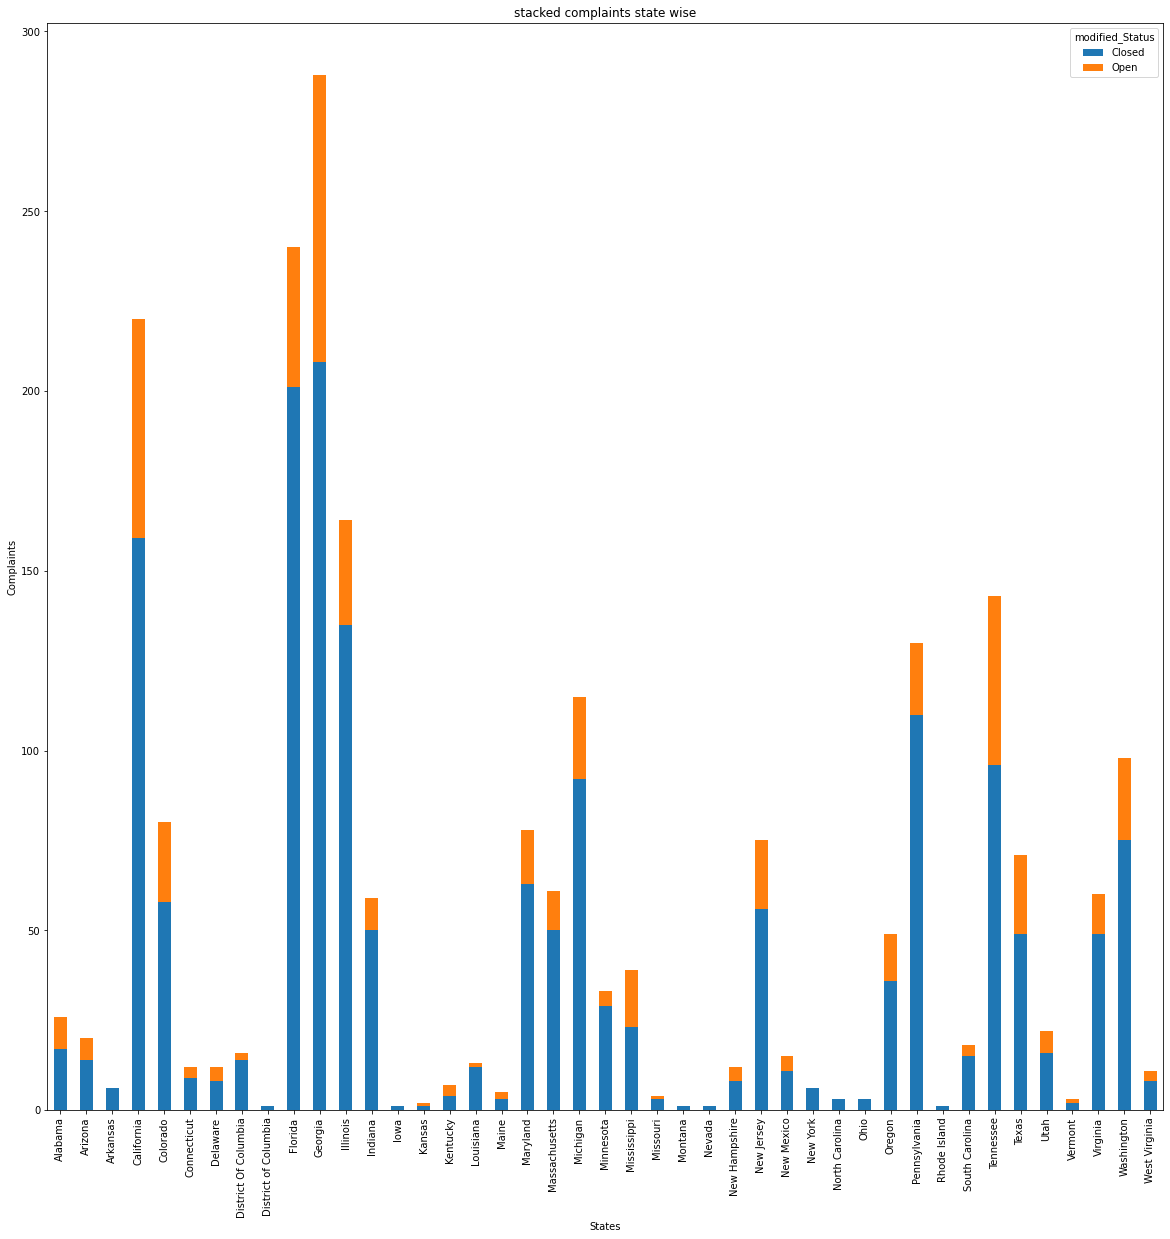

In [17]:
complaint = df.groupby(["State", "modified_Status"]).size().unstack().fillna(0)
complaint.plot(kind='bar', figsize = (20,20) , stacked =True)
plt.xlabel('States')
plt.ylabel("Complaints")
plt.title('stacked complaints state wise' )
plt.show()



# state wise status of complaints in a stacked bar chart. 
georgia has the maximum number of complaints , followed by florida and california 

->Which state has the maximum complaints

In [18]:
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().rename({0: "Complaint count"}, axis=1)[:1]

,Complaint count
State,
Georgia,288


->Which state has the highest percentage of unresolved complaints

In [19]:
total = complaint.Open + complaint.Closed
unresolved = complaint.Open/total
unresolved =unresolved *100
unresolved.sort_values(ascending  =False)

State
Kansas                  50.000000
Kentucky                42.857143
Mississippi             41.025641
Maine                   40.000000
Alabama                 34.615385
New Hampshire           33.333333
Vermont                 33.333333
Delaware                33.333333
Tennessee               32.867133
Texas                   30.985915
Arizona                 30.000000
Georgia                 27.777778
California              27.727273
Colorado                27.500000
West Virginia           27.272727
Utah                    27.272727
New Mexico              26.666667
Oregon                  26.530612
New Jersey              25.333333
Connecticut             25.000000
Missouri                25.000000
Washington              23.469388
Michigan                20.000000
Maryland                19.230769
Virginia                18.333333
Massachusetts           18.032787
Illinois                17.682927
South Carolina          16.666667
Florida                 16.250000
Pennsylv

# Kansas has highest percentage  of unresolved cases which is 50%

->Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [20]:
df3 = df.groupby(["State"]).size().sort_values(ascending=False).to_frame().rename({0: "Complaint count"}, axis=1)[:1]

In [23]:
per= df.groupby(['Received Via','Status']).size().unstack().fillna(0)
per['resolved'] = per['Closed']/per['Closed'].sum()*100
per['resolved']

Received Via
Customer Care Call    52.724796
Internet              47.275204
Name: resolved, dtype: float64

# the percentage of complaints resolved till date, which were received through the Internet and customer care calls